In [2]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.datasets import load_wine

from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

* We have loaded the necessary libraries above
* Now let's load the data

In [3]:
data = load_wine(as_frame=True)
df = data.data.copy()  # features
# Look at the documentation (https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html)
# and save the label in a column called 'y' in df.
# df['y'] = ... ## YOUR CODE HERE # label
df['y'] = data.target
df['y'].value_counts()
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,y
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [5]:
#How many samples and features are there?

samples = len(df)
features = len(df.columns) - 1
print('number of samples:', samples , 'number of features:', features) 

number of samples: 178 number of features: 13


In [6]:
# Quiz Q1
# How many instances are there for each class? 
for i in range(len(df['y'].unique())):
    print(len(df[df['y']==i]))
df['y'].value_counts()
    

59
71
48


1    71
0    59
2    48
Name: y, dtype: int64

In [8]:
# Calculate the means, medians, and standard deviations of each feature
# YOUR CODE HERE
print()
print("-----mean-----")
print(df.mean())
print()
print("-----median----")
print(df.median())
print()
print("-------std-----")
print(df.std())


-----mean-----
alcohol                          13.000618
malic_acid                        2.336348
ash                               2.366517
alcalinity_of_ash                19.494944
magnesium                        99.741573
total_phenols                     2.295112
flavanoids                        2.029270
nonflavanoid_phenols              0.361854
proanthocyanins                   1.590899
color_intensity                   5.058090
hue                               0.957449
od280/od315_of_diluted_wines      2.611685
proline                         746.893258
y                                 0.938202
dtype: float64

-----median----
alcohol                          13.050
malic_acid                        1.865
ash                               2.360
alcalinity_of_ash                19.500
magnesium                        98.000
total_phenols                     2.355
flavanoids                        2.135
nonflavanoid_phenols              0.340
proanthocyanins               

<AxesSubplot:>

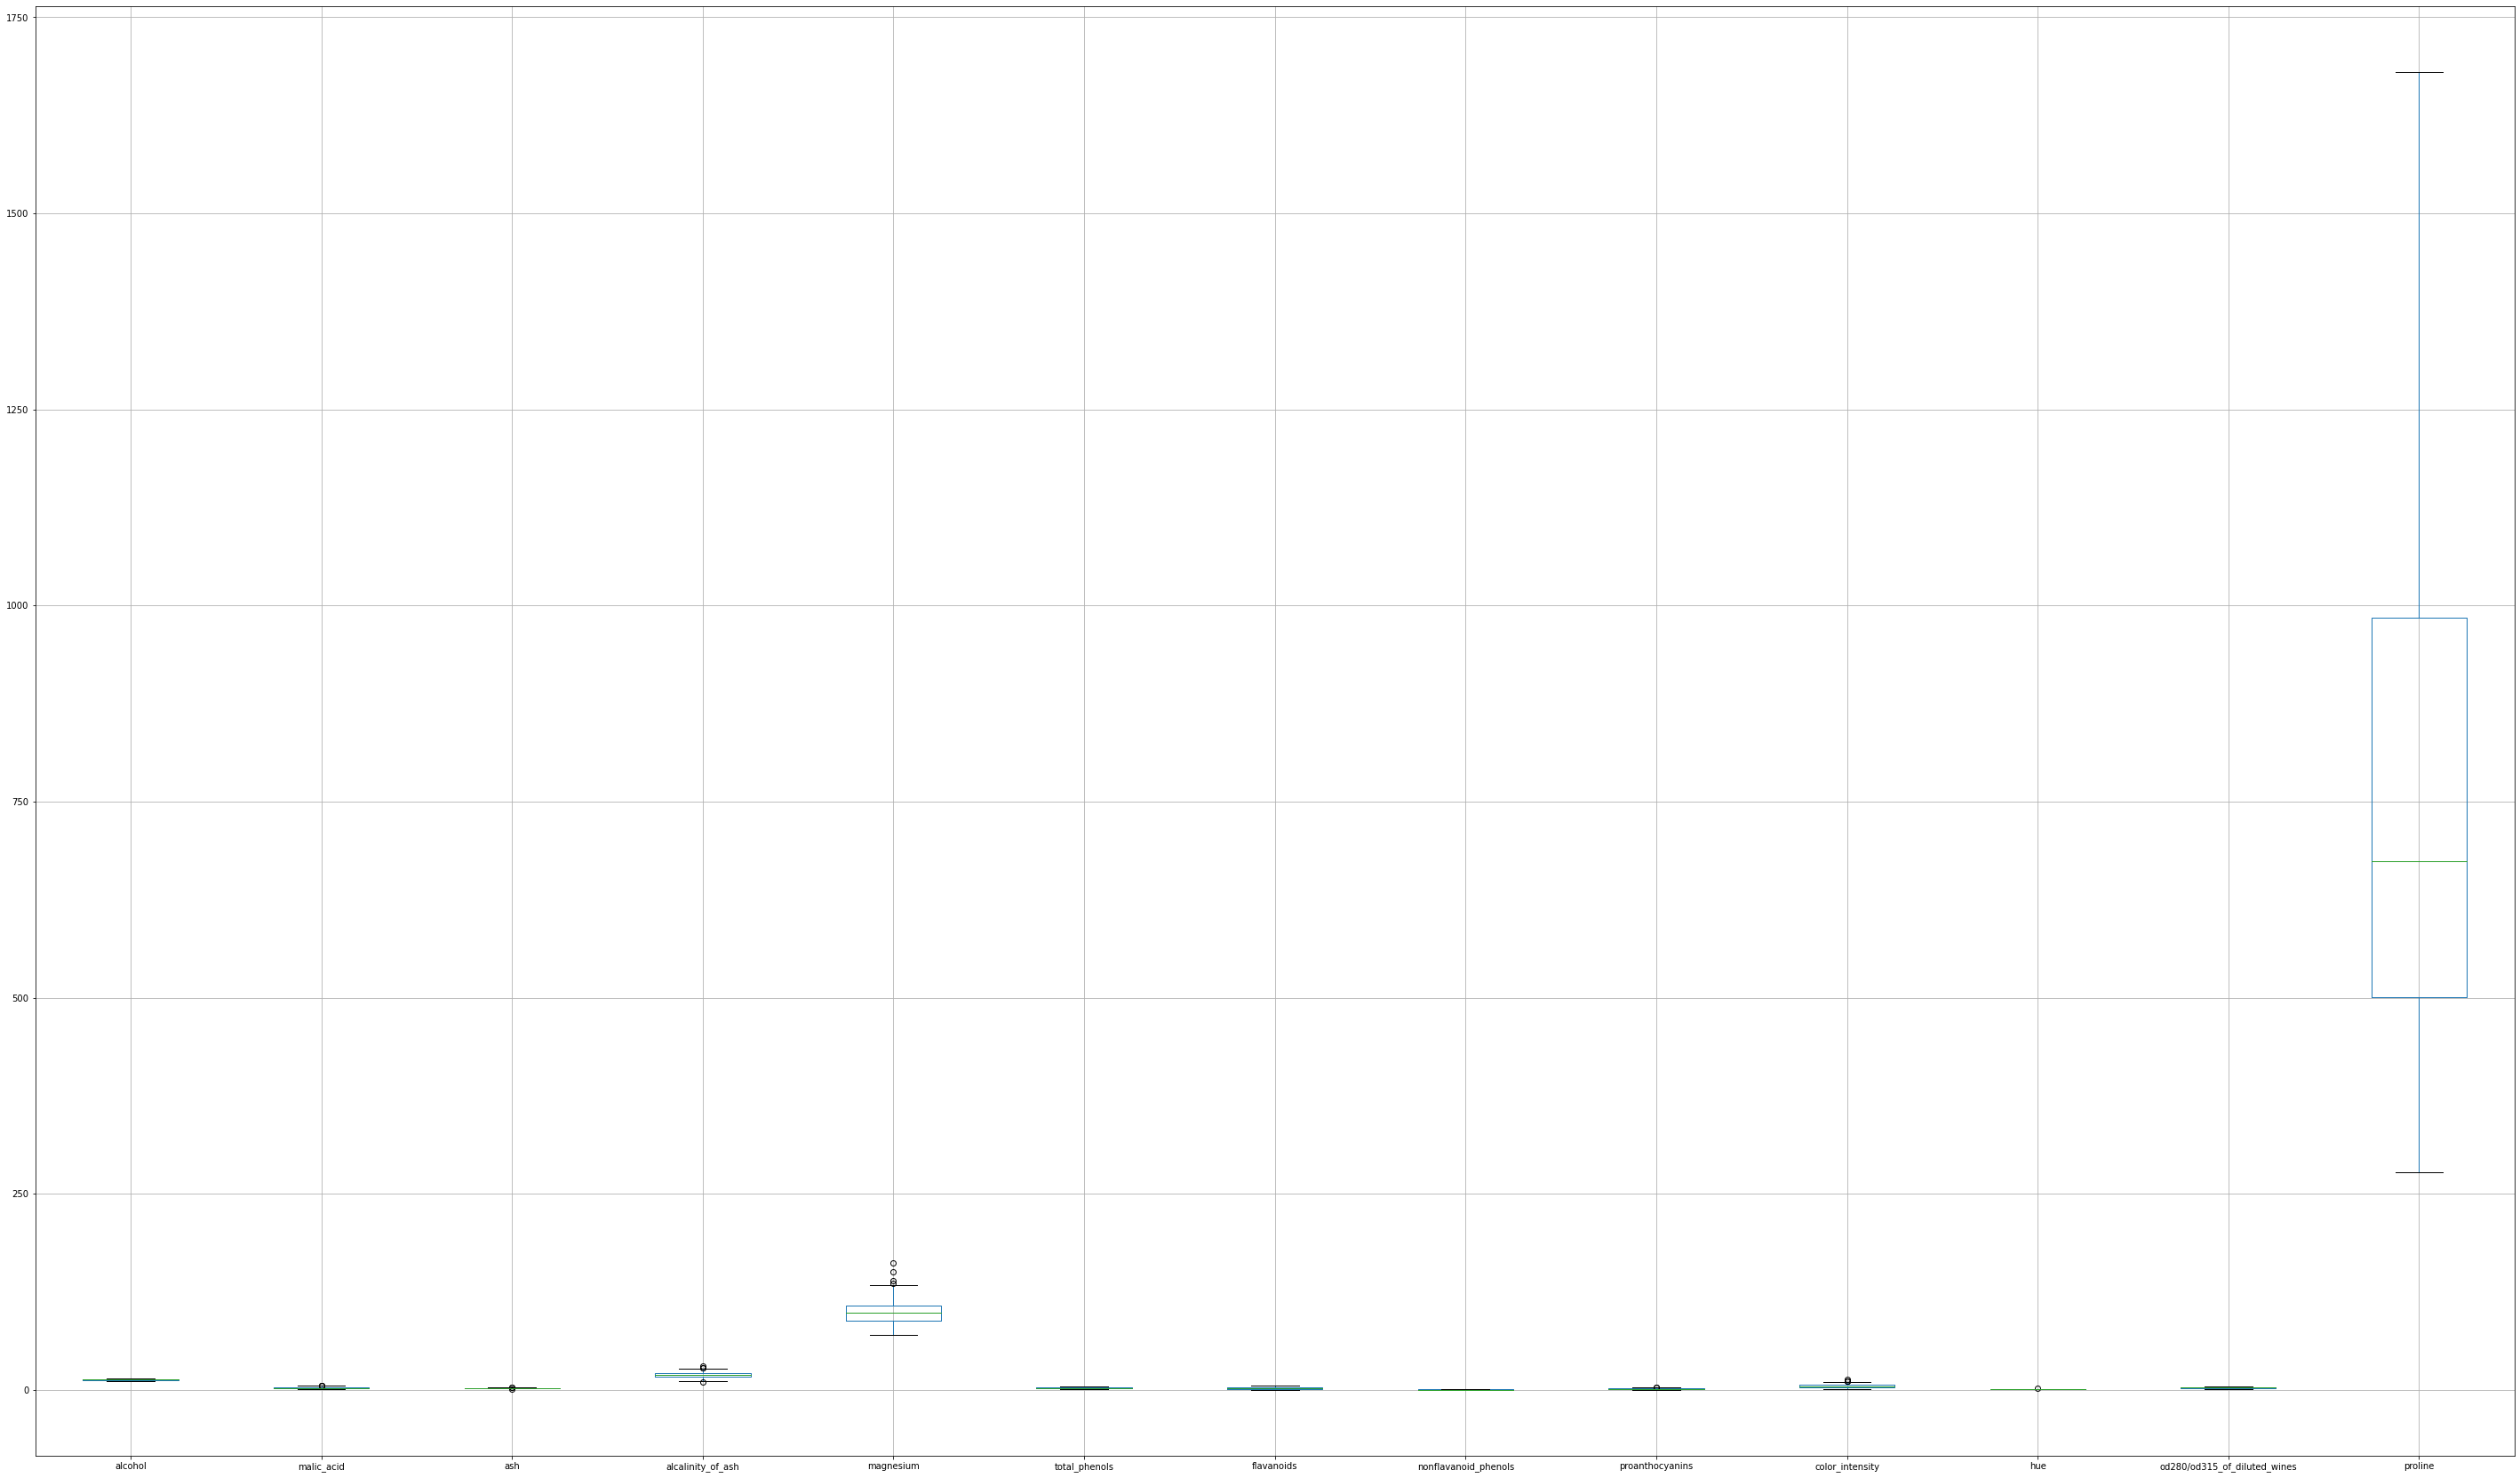

In [10]:
# Plot a boxplot of each feature (NOT THE LABEL!!) (all in one plot -- you can do this with a single line of code).
# Quiz Q2: Is there any feature that is in a clearly different scale than the others? --proline

# YOUR CODE HERE
df.drop('y', axis=1).boxplot(figsize=(50,30))



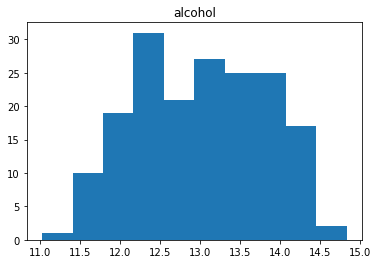

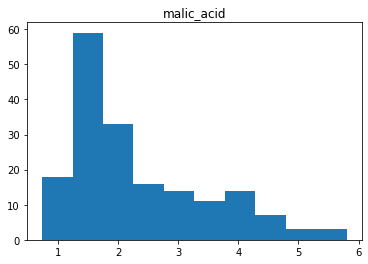

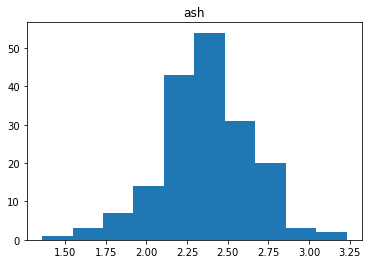

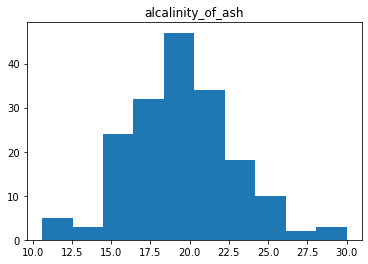

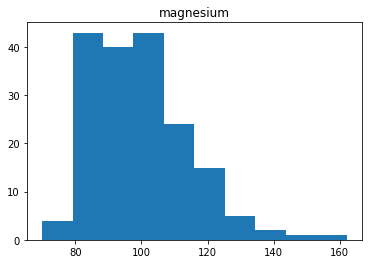

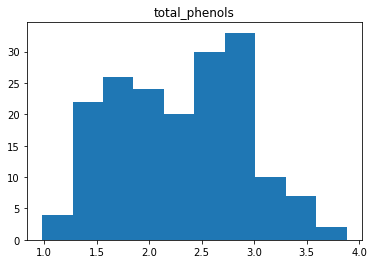

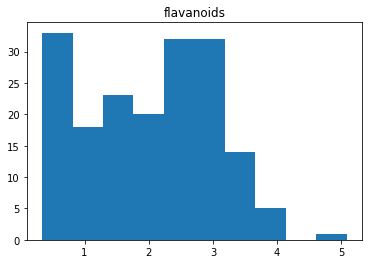

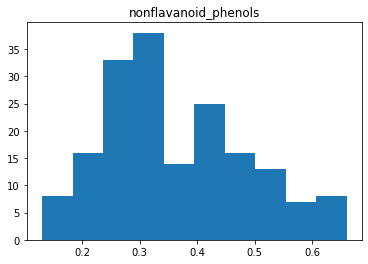

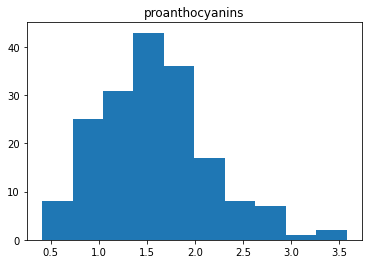

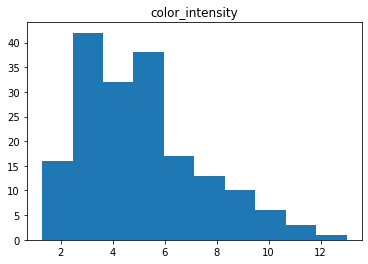

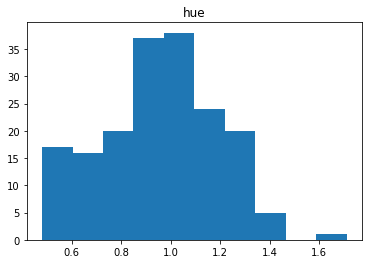

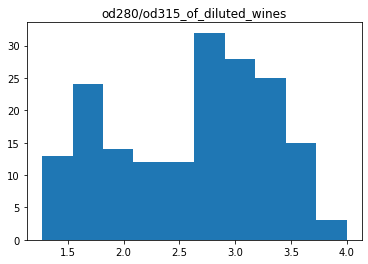

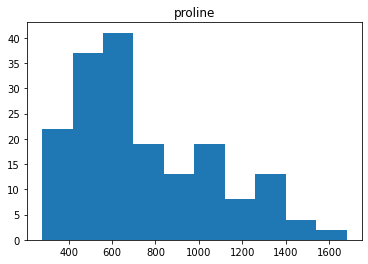

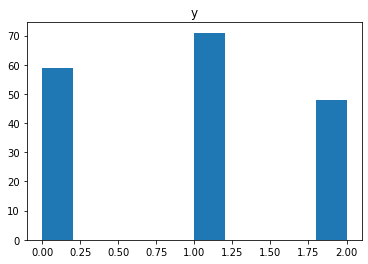

In [11]:
# Let's look at the distributions of values of our features. Draw a histogram for each of the features

# YOUR CODE HERE
for i in df.columns:
    plt.figure()
    plt.title(f'{i}')
    plt.hist(df[i])

Let's do some multivariate analysis

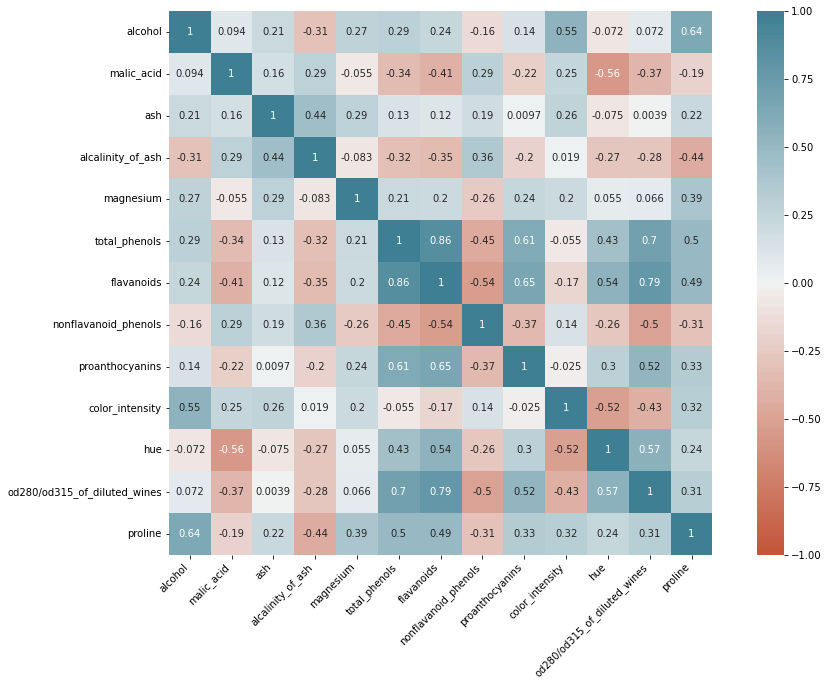

In [12]:
# Calculate the correlations between each pair of variables

# YOUR CODE HERE
df.corr()

# Plot a heatmap of the correlations between pairs of FEATURES (i.e., don't include the target!)

# YOUR CODE HERE
plt.figure(figsize = (16,10))
ax = sns.heatmap(
    df.drop('y',axis=1).corr(), 
    vmin=-1, vmax=1, center=0,
    annot = True,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [13]:
# What is the highest correlation between features?

corr = df.corr() # df is the pandas dataframe
corr[corr == 1] = 0
c1 = corr.abs().unstack()
c1.sort_values(ascending = False)

total_phenols      flavanoids                      0.864564
flavanoids         total_phenols                   0.864564
                   y                               0.847498
y                  flavanoids                      0.847498
                   od280/od315_of_diluted_wines    0.788230
                                                     ...   
magnesium          magnesium                       0.000000
alcalinity_of_ash  alcalinity_of_ash               0.000000
ash                ash                             0.000000
malic_acid         malic_acid                      0.000000
y                  y                               0.000000
Length: 196, dtype: float64

You should have noticed that some of the features are highly correlated. 

For this reason, we can run into trouble when trying to train a classifier due to multicolinearity.

Let's do PCA on this dataset to remove these correlations

In [14]:
# Let's do PCA:
# HINT: I suggest you attempt Q5 of the quiz and then use the function you developed
#       in this and some of the following cells.

# 1. Standardise your data using a StandardScaler. Make sure you're not scaling the 'y'!
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = df.drop('y', axis=1)
X_d = scaler.fit_transform(X)

# YOUR CODE HERE

# 2. Do PCA with 2 components. How much variance is retained from the original dataset?

# YOUR CODE HERE
from sklearn.decomposition import PCA, KernelPCA
pca = PCA(n_components=2)
X_p = pca.fit_transform(X_d)
# We can see the explained variance (w.r.t. original dataset) ratio of each component: 
print(pca.explained_variance_ratio_)


[0.36198848 0.1920749 ]


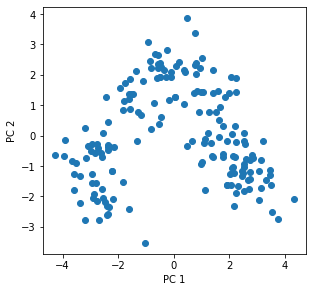

In [15]:
# Plot your two components, using the label from the data to colour the points

# YOUR CODE HERE
plt.figure(figsize=(16,10))
for i in range(1, 2):
    plt.subplot(2, 3, i)
    plt.scatter(X_p[:, i-1], X_p[:, i])
    plt.xlabel('PC %d' % i)
    plt.ylabel('PC %d' % (i+1))
# plt.savefig('students_pca_pcs.pdf', dpi=300)
plt.show()


In [16]:
# How many components do you need to keep at least 85% of the variance in the dataset? (Q6)

# YOUR CODE HERE
pca = PCA(n_components=0.85)
X_p = pca.fit_transform(X_d)
# We can see the explained variance (w.r.t. original dataset) ratio of each component: 
# print(pca.explained_variance_ratio_)
np.cumsum(pca.explained_variance_ratio_)


array([0.36198848, 0.55406338, 0.66529969, 0.73598999, 0.80162293,
       0.85098116])

In [17]:
# How much variance is retained if we do PCA with 3 components? (Q7)

# YOUR CODE HERE
pca = PCA(n_components=3)
X_p = pca.fit_transform(X_d)
# We can see the explained variance (w.r.t. original dataset) ratio of each component: 
# print(pca.explained_variance_ratio_)
np.cumsum(pca.explained_variance_ratio_)

array([0.36198848, 0.55406338, 0.66529969])

## Clustering

Let's see how many clusters does K-Means find.



In [ ]:
# Use the elbow method to select the number of clusters in your data using 3 PCs.

# YOUR CODE HERE


In [ ]:
# Now use the silhouette score to choose between the two candidate k values from the previous cell

# YOUR CODE HERE


In [ ]:
# Visualise the first two pcs (using a scatterplot) using the labels from KMeans with your chosen value of k

# YOUR CODE HERE


Now we can try to understand our clusters.

In [ ]:
# In the original (before PCA and before standardisation) dataframe, add a column called 'cluster' that contains
# the cluster assignment from above

# YOUR CODE HERE


In [ ]:
# Do a boxplot of each feature, separating between clusters

# YOUR CODE HERE


Write your observations here.
For example: is there a clear difference between the clusters in terms of alcohol content? What about flavanoids?

In [ ]:
# Feel free to keep playing with the data here!